In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
%matplotlib inline

In [96]:
sns.set(style='ticks', font_scale=1.3)

In [ ]:
plt.errorbar()

In [48]:
def linplot16(values, figsize=(6, 4), ax=None, title=None, kind='plot', **plt_kws):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    
    if kind == 'plot':
        plt_kws.setdefault('marker', 'o')
        plt_kws.setdefault('lw', 0)
        ax.plot(values, **plt_kws)
    elif kind == 'errorbar':
        ax.errorbar(x=np.arange(16), y=values, **plt_kws)
    else:
        left_bins = np.arange(16)
        ax.bar(left_bins, values, **plt_kws)
    ax.grid(True)
    ax.set_xticks(range(16))
    ax.set_xlabel('Spot')
    if title is not None:
        ax.set_title(title, va='bottom')
    return ax

In [180]:
savefigures = True

def savefig(fname, **kwargs):
    if not savefigures:
        return
    dir_ = 'figures/'
    kwargs.setdefault('dpi', 300)
    kwargs.setdefault('bbox_inches', 'tight')
    kwargs.setdefault('frameon', False)
    plt.savefig(dir_ + fname, **kwargs)

In [49]:
[f for f in Path('data').glob('*.csv')]

[WindowsPath('data/DCR_2015-08-28.csv'),
 WindowsPath('data/T-NTD-3new_66pM-100mW-LP-BP-Dich532-635_7_Fit_Results.csv'),
 WindowsPath('data/TA-15-NT-3_LP-BP-100mW_5_Fit_Results.csv')]

In [50]:
df_do_r = pd.read_csv('data/T-NTD-3new_66pM-100mW-LP-BP-Dich532-635_7_Fit_Results.csv')
df_do_r[:3]

,Channel,BR,DCR,Samp BR,Unnamed: 4,Unnamed: 5,#Bursts,A1 (4),Tau1 (4),dTau1 (4),f1 (4),A2 (4),Tau2 (4),dTau2 (4),f2 (4),<Tau> (4),BL (4)
0,NaN,Hz,Hz,Hz,NaN,NaN,NaN,NaN,ns,NaN,NaN,NaN,ns,NaN,NaN,ns,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted
2,0.0,11640,3534.2,8105.8,2.293532,0.696375,4267.0,1713.807,3.793765,0.02203813,0.95298407025004,610.1302,0.5257378,0.05005014,0.04701592974996,3.641,11.34


In [102]:
df_fret_r = pd.read_csv('data/TA-15-NT-3_LP-BP-100mW_5_Fit_Results.csv')
df_fret_r[:3]

,Channel,BR,DCR,Samp BR,Unnamed: 4,Unnamed: 5,#Bursts,A1 (4),Tau1 (4),dTau1 (4),f1 (4),A2 (4),Tau2 (4),dTau2 (4),f2 (4),<Tau> (4),BL (4),Unnamed: 17
0,NaN,Hz,Hz,Hz,NaN,NaN,NaN,NaN,ns,NaN,NaN,NaN,ns,NaN,NaN,ns,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,Weighted,NaN
2,0.0,6960,3534.2,3425.8,0.969328,0.492213,4570.0,573.8358,3.509945,0.01123845,0.844563629658386,453.9413,0.8165984,0.06558247,0.155436370341615,3.099,10.41,NaN


In [76]:
df_do = (df_do_r
         .drop(0).drop(1)
         .apply(pd.to_numeric)
         .rename(columns={c: c.replace('(4)', '').strip() for c in df_do_r.columns})
         .rename(columns={'BL': 'baseline', 'BR': 'BG'})
         .assign(Channel=lambda x: x.Channel.astype('int'))
         .set_index('Channel')
         .rename_axis('Spot')
         )
df_do

,BG,DCR,Samp BR,Unnamed: 4,Unnamed: 5,#Bursts,A1,Tau1,dTau1,f1,A2,Tau2,dTau2,f2,<Tau>,baseline
Spot,,,,,,,,,,,,,,,,
0,11640,3534.2,8105.8,2.293532,0.696375,4267.0,1713.8070,3.793765,0.022038,0.952984,610.1302,0.525738,0.050050,0.047016,3.641,11.340
1,8880,185.6,8694.4,46.844828,0.979099,6850.0,3271.0140,3.781924,0.028951,0.951395,1001.6550,0.630948,0.132100,0.048605,3.632,8.776
2,9818,618.2,9199.8,14.881592,0.937034,6407.0,2991.4590,3.865012,0.028178,0.942322,844.9431,0.837563,0.103472,0.057678,3.685,8.544
3,11590,1747.3,9842.7,5.633091,0.849241,5897.0,2544.2600,3.781370,0.005867,0.940600,926.0156,0.656108,0.008116,0.059400,3.611,14.480
4,11970,2196.8,9773.2,4.448835,0.816475,5932.0,2695.4380,3.829968,0.004340,0.938810,910.2735,0.739191,0.007435,0.061190,3.642,11.930
5,10630,443.5,10186.5,22.968433,0.958278,6352.0,3109.4160,3.830250,0.020854,0.943025,963.9191,0.746496,0.137308,0.056975,3.656,7.791
6,11590,1083.2,10506.8,9.699778,0.906540,6643.0,3122.6390,3.871201,0.008891,0.935565,969.1376,0.859080,0.028749,0.064435,3.677,10.550
7,11650,1203.2,10446.8,8.682513,0.896721,6052.0,2777.5120,3.858383,0.022034,0.938299,836.2266,0.842732,0.081361,0.061701,3.671,9.195
8,10440,46.5,10393.5,223.516129,0.995546,6598.0,2942.7980,3.977432,0.078806,0.910815,1103.1650,1.038931,0.175134,0.089185,3.684,7.094


In [104]:
df_fret = (df_fret_r
         .drop(0).drop(1).drop('Unnamed: 17', 1)
         .apply(pd.to_numeric)
         .rename(columns={c: c.replace('(4)', '').strip() for c in df_do_r.columns})
         .rename(columns={'BL': 'baseline', 'BR': 'BG'})
         .assign(Channel=lambda x: x.Channel.astype('int'))
         .set_index('Channel')
         .rename_axis('Spot')
         
         )
df_fret

,BG,DCR,Samp BR,Unnamed: 4,Unnamed: 5,#Bursts,A1,Tau1,dTau1,f1,A2,Tau2,dTau2,f2,<Tau>,baseline
Spot,,,,,,,,,,,,,,,,
0,6960,3534.2,3425.8,0.969328,0.492213,4570.0,573.8358,3.509945,0.011238,0.844564,453.9413,0.816598,0.065582,0.155436,3.099,10.410
1,3873,185.6,3687.4,19.867457,0.952078,8588.0,1269.3480,3.535146,0.019401,0.762992,1526.8920,0.912898,0.025144,0.237008,2.908,8.336
2,4459,618.2,3840.8,6.212876,0.861359,8589.0,1372.9520,3.539679,0.038553,0.798070,1308.4870,0.939746,0.042350,0.201930,3.013,10.370
3,5833,1747.3,4085.7,2.338293,0.700446,9212.0,1236.1980,3.539272,0.069571,0.803335,1223.8380,0.875203,0.029880,0.196665,3.000,20.820
4,6374,2196.8,4177.2,1.901493,0.655350,7927.0,1293.4420,3.571940,0.035386,0.826067,1180.6690,0.823931,0.019258,0.173933,3.082,14.250
5,4603,443.5,4159.5,9.378805,0.903650,9656.0,1583.2260,3.610062,0.038623,0.781895,1848.7520,0.862377,0.099797,0.218105,2.992,9.829
6,5231,1083.2,4147.8,3.829210,0.792927,9785.0,1687.2180,3.604497,0.030029,0.807894,1625.7630,0.889498,0.046161,0.192106,3.082,15.300
7,5358,1203.2,4154.8,3.453125,0.775439,8758.0,1524.9830,3.610938,0.036514,0.812750,1399.2280,0.906694,0.044076,0.187250,3.105,12.750
8,3999,46.5,3952.5,85.000000,0.988372,9982.0,1939.6870,3.505521,0.037094,0.818099,1794.7250,0.842394,0.038440,0.181901,3.021,9.125


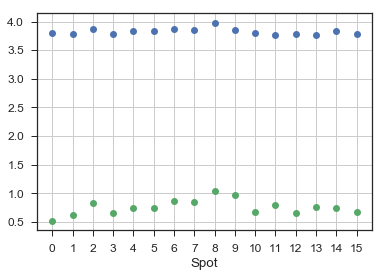

In [77]:
linplot16(df_do.Tau1)
linplot16(df_do.Tau2, ax=plt.gca())

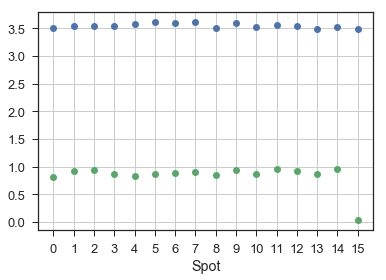

In [105]:
linplot16(df_fret.Tau1)
linplot16(df_fret.Tau2, ax=plt.gca())

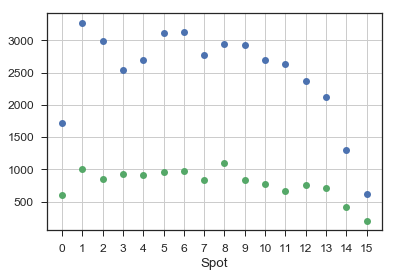

In [78]:
linplot16(df_do.A1)
linplot16(df_do.A2, ax=plt.gca())

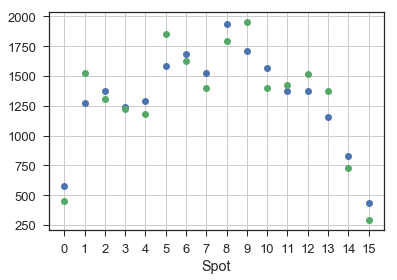

In [196]:
linplot16('A1', data=df_fret)
linplot16('A2', data=df_fret, ax=plt.gca())

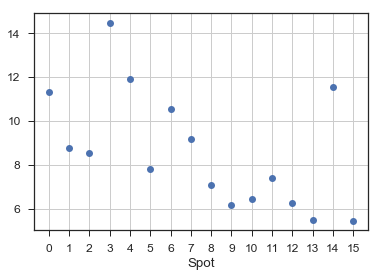

In [79]:
linplot16(df_do.baseline)

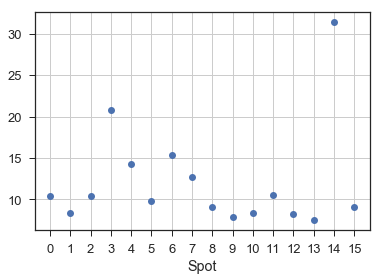

In [107]:
linplot16(df_fret.baseline)

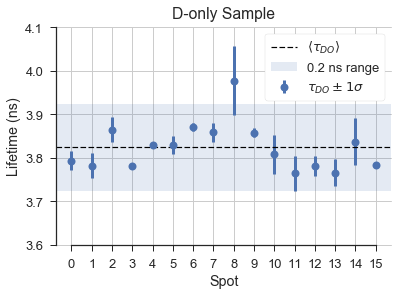

In [139]:
df = df_do
linplot16(df.Tau1, kind='errorbar', yerr=df.dTau1, marker='o', ms=8, lw=0, elinewidth=3, 
          title='D-only Sample', label=r'$\tau_{DO} \pm 1\sigma$')
plt.ylim(3.6, 4.1)
plt.axhline(df.Tau1.mean(), ls='--', color='k', lw=1.2, label=r'$\langle\tau_{DO}\rangle$')
plt.axhspan(df.Tau1.mean() - 0.1, df.Tau1.mean() + 0.1, alpha=0.15, label='0.2 ns range')
plt.ylabel('Lifetime (ns)')
leg = plt.legend(frameon=True)#, loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set(alpha=1)
sns.despine(trim=True, offset=0)

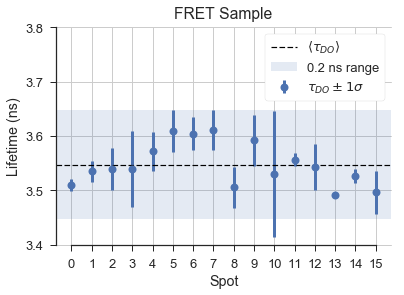

In [140]:
df = df_fret
linplot16(df.Tau1, kind='errorbar', yerr=df.dTau1, marker='o', ms=8, lw=0, elinewidth=3, 
          title='FRET Sample', label=r'$\tau_{DO} \pm 1\sigma$')
plt.ylim(3.4, 3.8001)
plt.axhline(df.Tau1.mean(), ls='--', color='k', lw=1.2, label=r'$\langle\tau_{DO}\rangle$')
plt.axhspan(df.Tau1.mean() - 0.1, df.Tau1.mean() + 0.1, alpha=0.15, label='0.2 ns range')
plt.ylabel('Lifetime (ns)')
leg = plt.legend(frameon=True)#, loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set(alpha=1)
sns.despine(trim=True, offset=0)

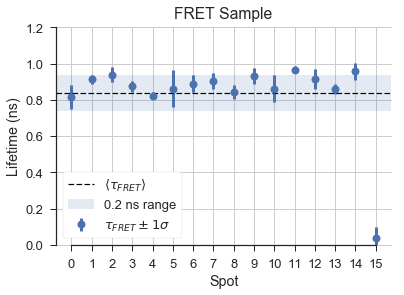

In [146]:
df = df_fret
linplot16(df.Tau2, kind='errorbar', yerr=df.dTau2, marker='o', ms=8, lw=0, elinewidth=3,
          title='FRET Sample', label=r'$\tau_{FRET} \pm 1\sigma$')
plt.ylim(0, 1.2001)
plt.axhline(df.Tau2.mean(), ls='--', color='k', lw=1.2, label=r'$\langle\tau_{FRET}\rangle$')
plt.axhspan(df.Tau2.mean() - 0.1, df.Tau2.mean() + 0.1, alpha=0.15, label='0.2 ns range')
plt.ylabel('Lifetime (ns)')
leg = plt.legend(frameon=True)#, loc='lower right')#, loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set(alpha=1)
sns.despine(trim=True, offset=0)

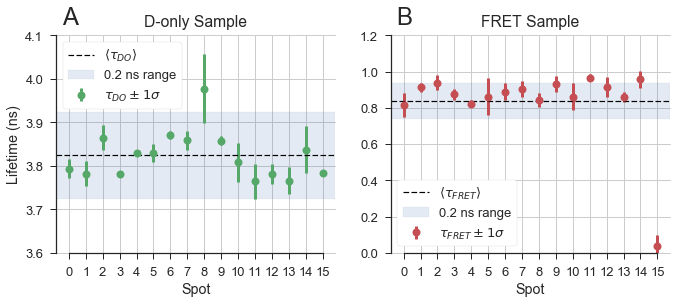

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
plt.subplots_adjust(wspace=0.2)

df = df_do
linplot16(df.Tau1, kind='errorbar', yerr=df.dTau1, marker='o', ms=8, lw=0, elinewidth=3, color='C1',
          title='D-only Sample', label=r'$\tau_{DO} \pm 1\sigma$', ax=ax[0])
ax[0].axhline(df.Tau1.mean(), ls='--', color='k', lw=1.2, label=r'$\langle\tau_{DO}\rangle$')
ax[0].axhspan(df.Tau1.mean() - 0.1, df.Tau1.mean() + 0.1, color='C0', alpha=0.15, label='0.2 ns range')
ax[0].set_ylim(3.6, 4.1)
ax[0].set_ylabel('Lifetime (ns)')
leg = ax[0].legend(frameon=True)#, loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set(alpha=1)

df = df_fret
linplot16(df.Tau2, kind='errorbar', yerr=df.dTau2, marker='o', ms=8, lw=0, elinewidth=3, color='C2',
          title='FRET Sample', label=r'$\tau_{FRET} \pm 1\sigma$', ax=ax[1])
ax[1].axhline(df.Tau2.mean(), ls='--', color='k', lw=1.2, label=r'$\langle\tau_{FRET}\rangle$')
ax[1].axhspan(df.Tau2.mean() - 0.1, df.Tau2.mean() + 0.1, color='C0', alpha=0.15, label='0.2 ns range')
ax[1].set_ylim(0, 1.2001)
#ax[1].set_ylabel('Lifetime (ns)')
leg = ax[1].legend(frameon=True)#, loc='lower right')#, loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set(alpha=1)

for p, a in zip('AB', ax):
    sns.despine(ax=a, trim=True, offset=0)
    a.text(0.02, 1.05, p, fontsize=24, transform=a.transAxes)
savefig('lifetime_fit_comp.png')

In [184]:
E_mean = 1 - df_fret.Tau2.mean()/df_fret.Tau1.mean()
E_mean

0.76407613113504935

In [252]:
s_2015_09_08_s5_ch0 = r"""
5.738358E+2 (+/- 7.918332E+0)	3.509945E+0 (+/- 1.123845E-2)
4.539413E+2 (+/- 2.273237E+1)	8.165984E-1 (+/- 6.558247E-2)
3.998304E+3 (+/- 3.033366E+2)	7.429515E-5 (+/- 7.260697E-5)
Mean Tau (ns): 3.099
Reduced Chi 2: 1.035421E+0 (Convergence Criterion: 1.000000E-1)
""".strip()

In [253]:
s_2015_09_08_s5_ch8 = r"""
1.939687E+3 (+/- 4.027781E+1)	3.505521E+0 (+/- 3.709420E-2)
1.794725E+3 (+/- 5.658245E+1)	8.423944E-1 (+/- 3.843980E-2)
2.637382E+4 (+/- 7.788459E+2)	6.871375E-7 (+/- 1.539140E-8)
Mean Tau (ns): 3.021
Reduced Chi 2: 4.156553E+0 (Convergence Criterion: 1.000000E-1)
""".strip()

In [246]:
s_2015_09_04_s7_ch0 = r"""
1.713807E+3 (+/- 1.642336E+1) 3.793765E+0 (+/- 2.203813E-2)
2.296607E+3 (+/- 3.878942E+1) 5.489616E-7 (+/- 3.041786E-8)
6.101302E+2 (+/- 2.609385E+1) 5.257378E-1 (+/- 5.005014E-2)
Mean Tau (ns): 3.641
Reduced Chi 2: 1.251208E+0 (Convergence Criterion: 1.000000E-1)
""".strip()

In [247]:
s_2015_09_04_s7_ch8 = r"""
2.942798E+3 (+/- 1.791387E+2) 3.977432E+0 (+/- 7.880588E-2)
1.463724E+4 (+/- 1.399626E+3) 4.186025E-6 (+/- 4.426261E-7)
1.103165E+3 (+/- 1.295558E+2) 1.038931E+0 (+/- 1.751343E-1)
Mean Tau (ns): 3.684
Reduced Chi 2: 2.629420E+0 (Convergence Criterion: 1.000000E-1)
""".strip()

In [254]:
from collections import defaultdict

In [255]:
def get_params(s):
    parnames = ['ampl', 'tau']
    param = defaultdict(list)
    for line in s.split('\n')[:3]:
        for name, p_str in zip(parnames, line.split(')')[:-1]):
            val, std = [float(x.strip()) for x in p_str.split('(+/-')]
            param[name].append(val)
            param[name+'_std'].append(std)
    return param

In [256]:
param0 = get_params(s_2015_09_08_s5_ch0)
param0

defaultdict(list,
            {'ampl': [573.8358, 453.9413, 3998.304],
             'ampl_std': [7.918332, 22.73237, 303.3366],
             'tau': [3.509945, 0.8165984, 7.429515e-05],
             'tau_std': [0.01123845, 0.06558247, 7.260697e-05]})

In [257]:
param8 = get_params(s_2015_09_08_s5_ch8)
param8

defaultdict(list,
            {'ampl': [1939.687, 1794.725, 26373.82],
             'ampl_std': [40.27781, 56.58245, 778.8459],
             'tau': [3.505521, 0.8423944, 6.871375e-07],
             'tau_std': [0.0370942, 0.0384398, 1.53914e-08]})

In [258]:
for i in range(3):
    print('{:5.0f} ± {:5.1f}  {:6.2f} ± {:5.1g}'.format(*[param0[k][i] for k in                                                             
                                                            ('ampl', 'ampl_std', 'tau', 'tau_std')]))

  574 ±   7.9    3.51 ±  0.01
  454 ±  22.7    0.82 ±  0.07
 3998 ± 303.3    0.00 ± 7e-05


In [259]:
for i in range(3):
    print('{:5.0f} ± {:5.1f}  {:6.2f} ± {:5.1g}'.format(*[param8[k][i] for k in                                                             
                                                            ('ampl', 'ampl_std', 'tau', 'tau_std')]))

 1940 ±  40.3    3.51 ±  0.04
 1795 ±  56.6    0.84 ±  0.04
26374 ± 778.8    0.00 ± 2e-08


In [248]:
param0 = get_params(s_2015_09_04_s7_ch0)
param0

defaultdict(list,
            {'ampl': [1713.807, 2296.607, 610.1302],
             'ampl_std': [16.42336, 38.78942, 26.09385],
             'tau': [3.793765, 5.489616e-07, 0.5257378],
             'tau_std': [0.02203813, 3.041786e-08, 0.05005014]})

In [249]:
param8 = get_params(s_2015_09_04_s7_ch8)
param8

defaultdict(list,
            {'ampl': [2942.798, 14637.24, 1103.165],
             'ampl_std': [179.1387, 1399.626, 129.5558],
             'tau': [3.977432, 4.186025e-06, 1.038931],
             'tau_std': [0.07880588, 4.426261e-07, 0.1751343]})

In [250]:
for i in range(3):
    print('{:5.0f} ± {:5.1f}  {:6.2f} ± {:5.1g}'.format(*[param0[k][i] for k in                                                             
                                                            ('ampl', 'ampl_std', 'tau', 'tau_std')]))

 1714 ±  16.4    3.79 ±  0.02
 2297 ±  38.8    0.00 ± 3e-08
  610 ±  26.1    0.53 ±  0.05


In [251]:
for i in range(3):
    print('{:5.0f} ± {:5.1f}  {:6.2f} ± {:5.1g}'.format(*[param8[k][i] for k in                                                             
                                                            ('ampl', 'ampl_std', 'tau', 'tau_std')]))

 2943 ± 179.1    3.98 ±  0.08
14637 ± 1399.6    0.00 ± 4e-07
 1103 ± 129.6    1.04 ±   0.2
